In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузите файл HR.csv в pandas dataframe

* satisfaction_level - Уровень удовлетворенности работой
* Last_evaluation - Время с момента последней оценки в годах
* number_projects - Количество проектов, выполненных за время работы
* average_monthly_hours - Среднее количество часов на рабочем месте в месяц
* time_spend_company - Стаж работы в компании в годах
* work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
* left - уволился ли сотрудник
* promotion_last_5years - повышался ли сотрудник за последние пять лет
* department - отдел в котором работает сотрудник
* salary - относительный уровень зарплаты

In [6]:
df = pd.read_csv('HR.csv')
df.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
### Определите две самые скоррелированные и две наименее скоррелированные переменные.

Text(0.5, 1.0, 'Корреляция')

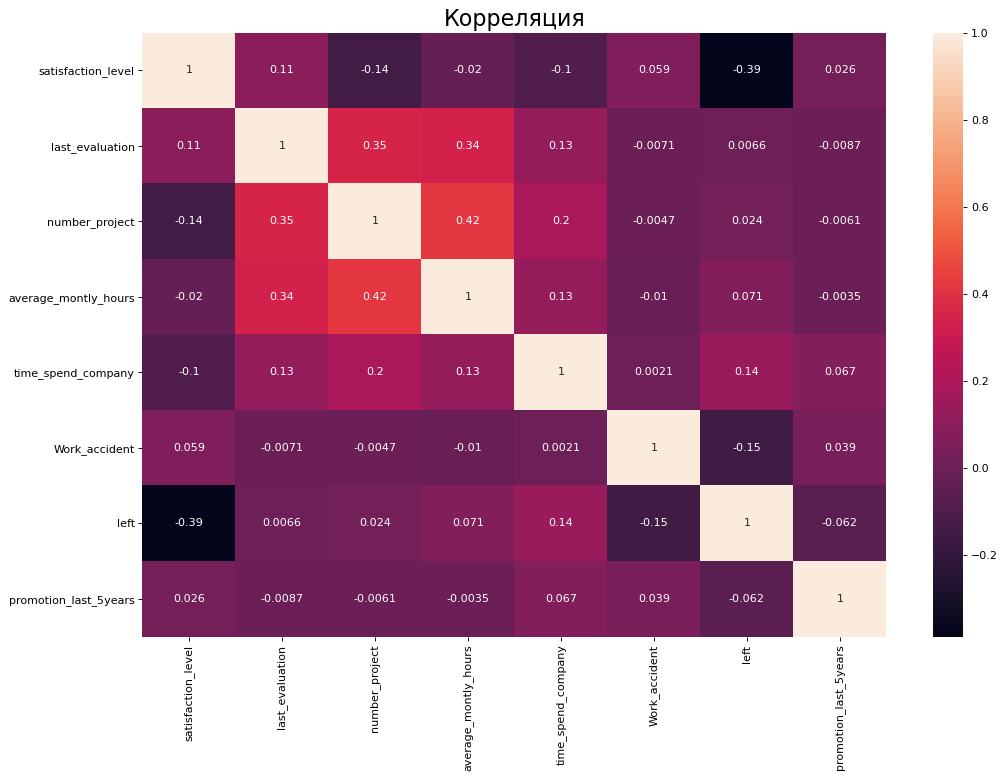

In [9]:
import seaborn as sns
#Хитмап корреляции
plt.figure(figsize=(15,10), dpi= 80)
sns.heatmap(df.corr(), annot=True)
plt.title('Корреляция', size = 20)

### Рассчитайте сколько сотрудников работает в каждом департаменте.

In [86]:
df.loc[df['left']==0].groupby('department').agg({'department': 'count'})
#log.loc[log.source_type!=log.source_type2] 

,department
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


### Показать распределение сотрудников по зарплатам

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

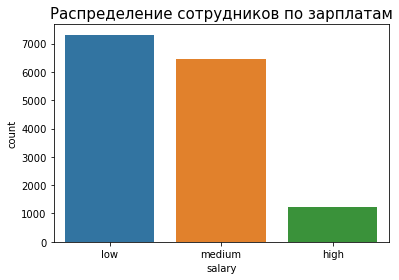

In [106]:
salary = df[['salary']].value_counts().reset_index().rename(columns={0: "count"})

sns.barplot(x='salary', y='count', data=salary)
plt.title('Распределение сотрудников по зарплатам', size = 15)

### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

Text(0.5, 1.0, 'Распределение размера зарплат по департаментам')

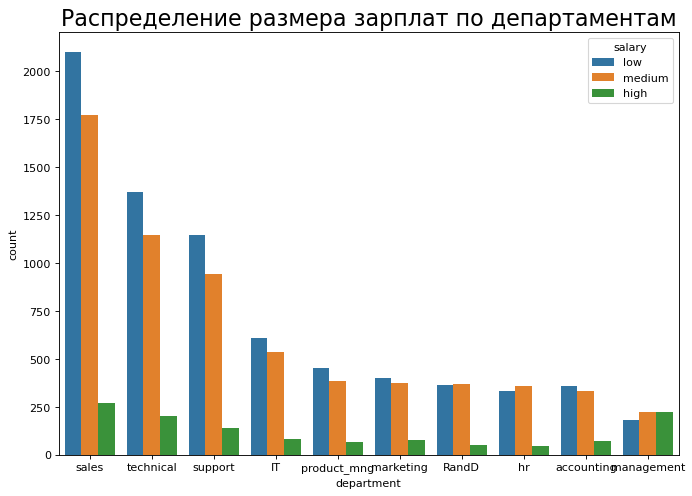

In [96]:
salary = df[['department','salary']].value_counts().reset_index().rename(columns={0: "count"})

plt.figure(figsize=(10,7), dpi= 80)
sns.barplot(x="department", y='count', hue="salary", data=salary);
plt.title('Распределение размера зарплат по департаментам', size = 20)

### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

### Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

### Разделить данные на тестовую и обучающую выборки
### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
### Оценить качество модели на тестовой выборки

In [37]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['left','department', 'salary'], axis=1), df[['left']], test_size=0.25)

In [42]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
lda.predict(X_test)
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test.iloc[0].array, lda.predict(X_test)]).T
result.head()

C:\Users\WNick\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,0,1
0,0.0,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0


In [64]:
y_test.reset_index().join(pd.DataFrame(lda.predict(X_test))) 

,index,left,0
0,4469,0,0
1,11615,0,0
2,12538,1,0
3,9096,0,0
4,8421,0,0
...,...,...,...
3745,2756,0,0
3746,5229,0,0
3747,3709,0,0
3748,6452,0,0


In [66]:
# расчитываем метрику точности
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7498666666666667

In [68]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.58575817,  0.55034881, -0.23990503,  0.00494326,  0.2378169 ,
        -1.08215067, -1.21219736]])